In [9]:
import os
import tensorflow as tf
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [2]:

zip_ref = zipfile.ZipFile("/kaggle/input/dogs-vs-cats/test1.zip", 'r')
zip_ref.extractall("/kaggle/working/")
zip_ref.close()
TEST_DIR = "/kaggle/working/test1"

In [3]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
test_generator = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                      batch_size=10,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

Found 0 images belonging to 0 classes.


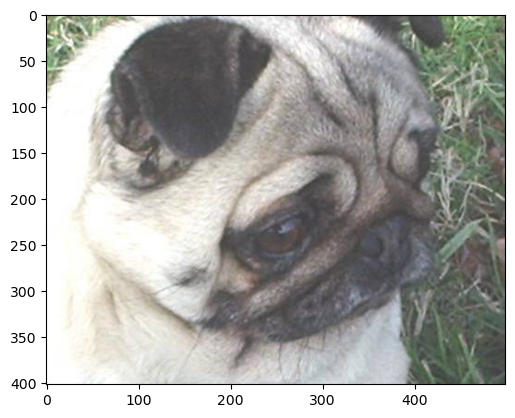

1/1 [==============================] - 0s 98ms/step
[[0.7088821]]
Das ist ein Hund


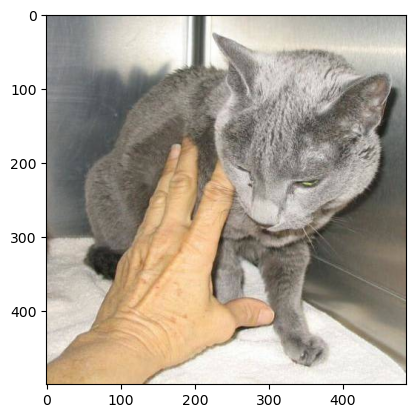

1/1 [==============================] - 0s 38ms/step
[[0.0441645]]
Das ist eine Katze


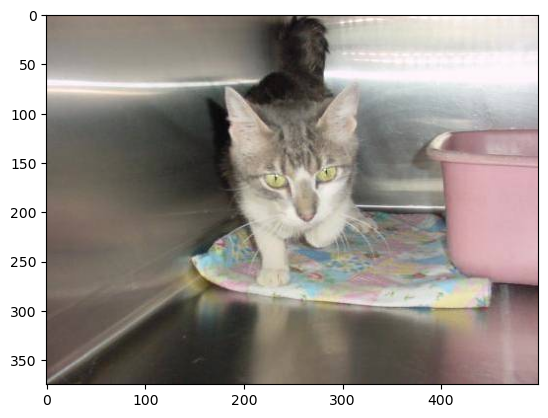

1/1 [==============================] - 0s 39ms/step
[[2.6103388e-08]]
Das ist eine Katze


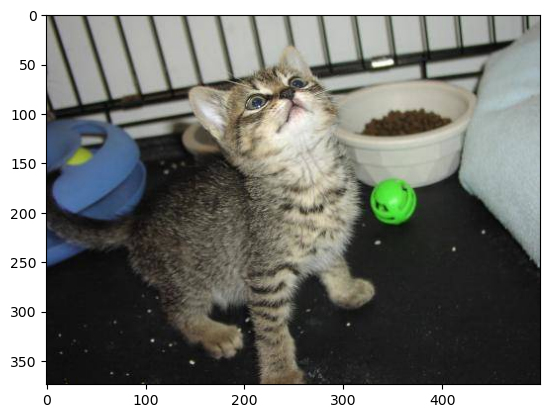

1/1 [==============================] - 0s 40ms/step
[[0.00346541]]
Das ist eine Katze


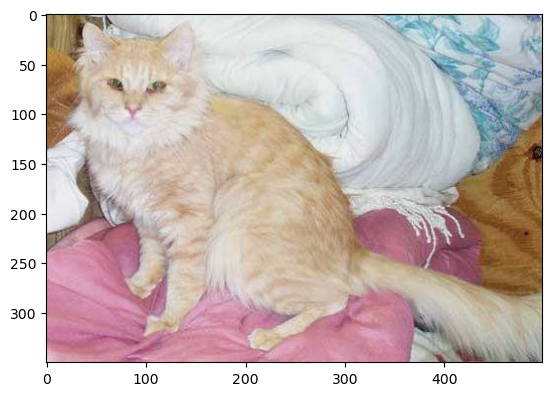

1/1 [==============================] - 0s 39ms/step
[[0.00027202]]
Das ist eine Katze


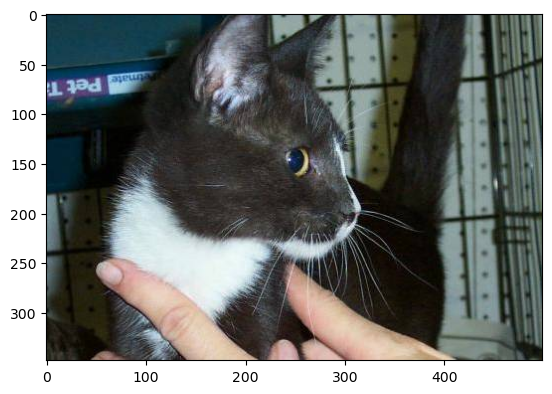

1/1 [==============================] - 0s 37ms/step
[[0.39840096]]
Das ist eine Katze


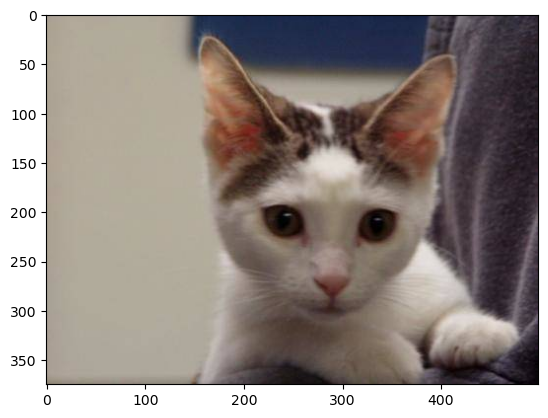

1/1 [==============================] - 0s 36ms/step
[[0.00068135]]
Das ist eine Katze


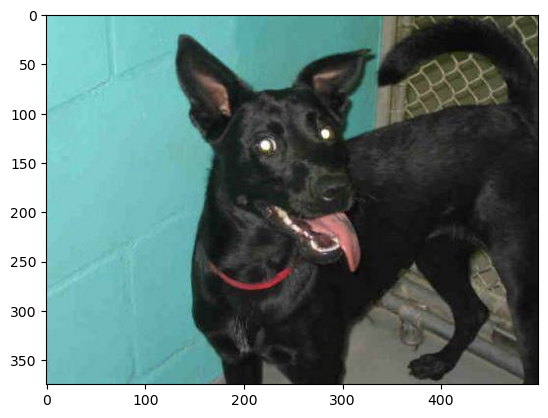

1/1 [==============================] - 0s 36ms/step
[[0.9769396]]
Das ist ein Hund


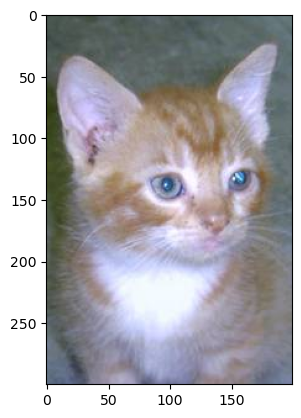

1/1 [==============================] - 0s 37ms/step
[[0.00032161]]
Das ist eine Katze


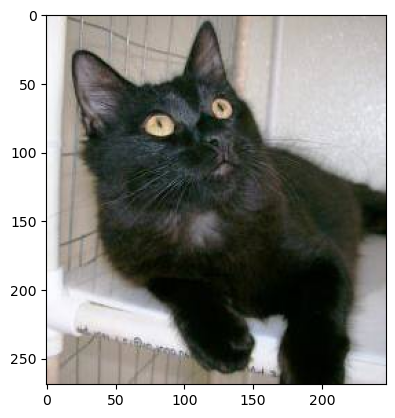

1/1 [==============================] - 0s 36ms/step
[[3.7194923e-06]]
Das ist eine Katze


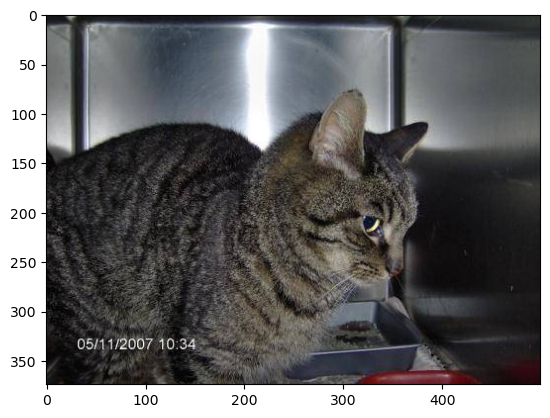

1/1 [==============================] - 0s 42ms/step
[[0.00022424]]
Das ist eine Katze


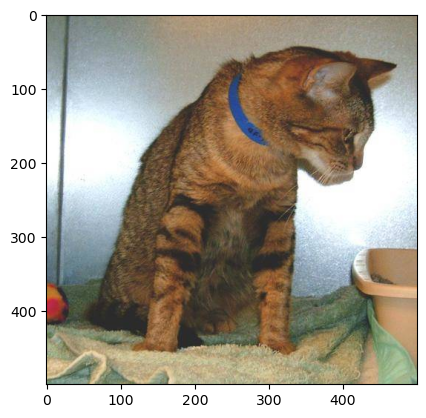

1/1 [==============================] - 0s 44ms/step
[[0.82270575]]
Das ist ein Hund


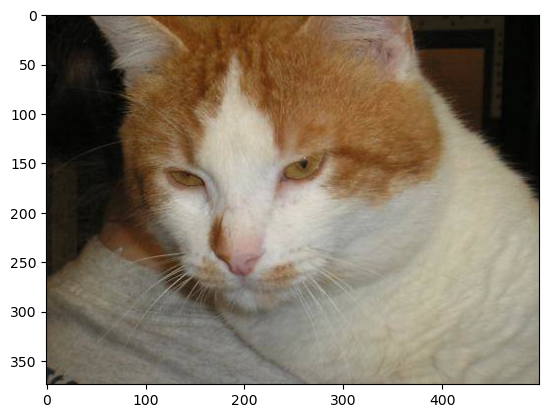

1/1 [==============================] - 0s 40ms/step
[[5.6824565e-06]]
Das ist eine Katze


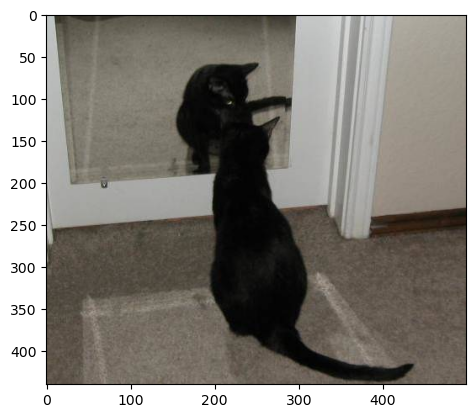

1/1 [==============================] - 0s 37ms/step
[[0.6873083]]
Das ist ein Hund


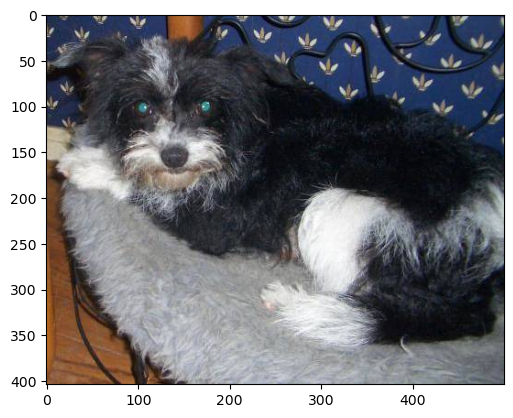

1/1 [==============================] - 0s 39ms/step
[[0.9999272]]
Das ist ein Hund


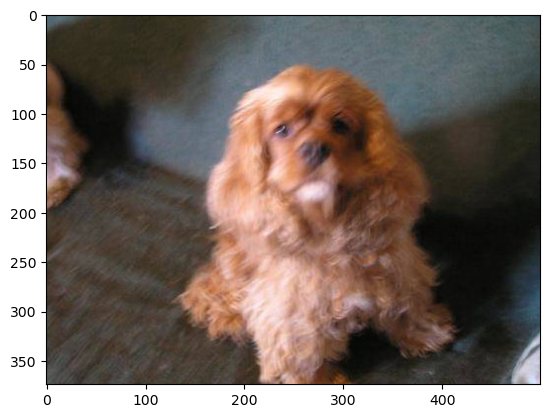

1/1 [==============================] - 0s 38ms/step
[[0.9917932]]
Das ist ein Hund


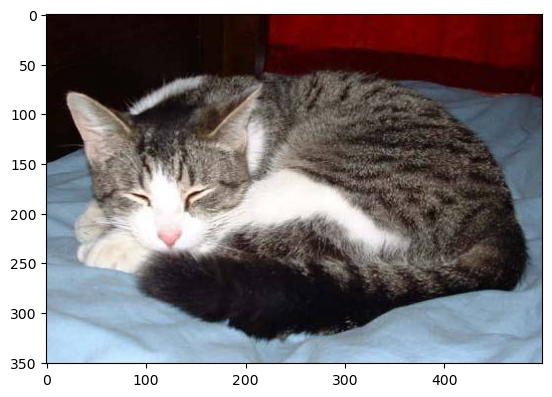

1/1 [==============================] - 0s 38ms/step
[[3.149593e-09]]
Das ist eine Katze


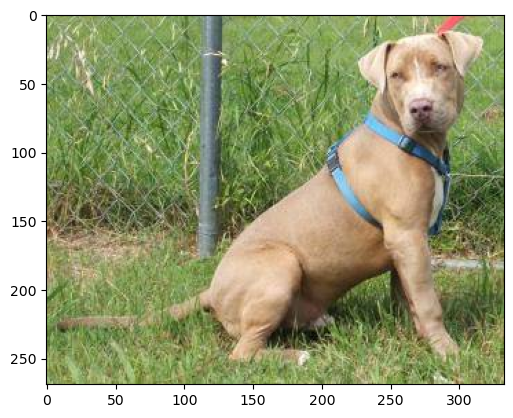

1/1 [==============================] - 0s 36ms/step
[[0.9999972]]
Das ist ein Hund


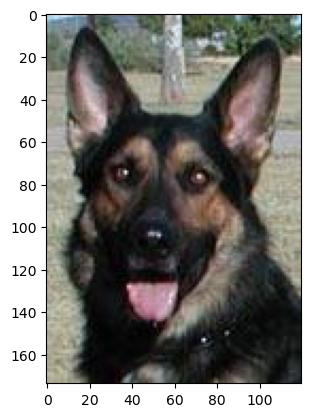

1/1 [==============================] - 0s 36ms/step
[[0.99999887]]
Das ist ein Hund


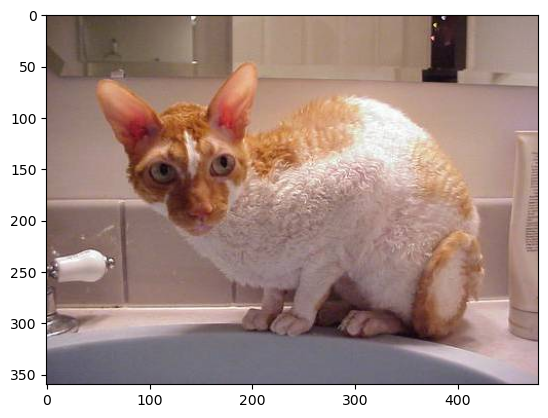

1/1 [==============================] - 0s 39ms/step
[[0.6835855]]
Das ist ein Hund


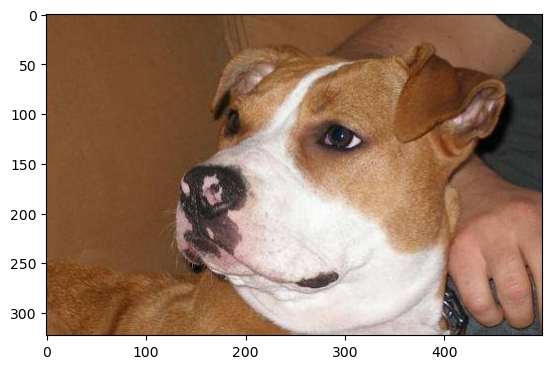

1/1 [==============================] - 0s 37ms/step
[[0.9999357]]
Das ist ein Hund


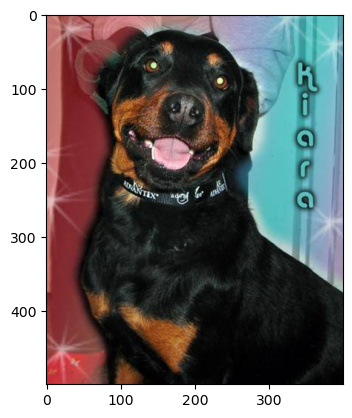

1/1 [==============================] - 0s 39ms/step
[[0.99999976]]
Das ist ein Hund


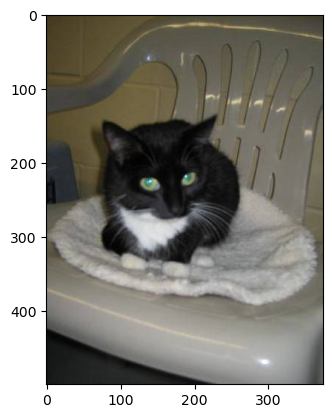

1/1 [==============================] - 0s 35ms/step
[[8.375019e-08]]
Das ist eine Katze


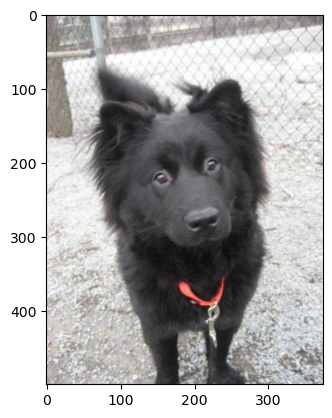

1/1 [==============================] - 0s 37ms/step
[[0.9998799]]
Das ist ein Hund


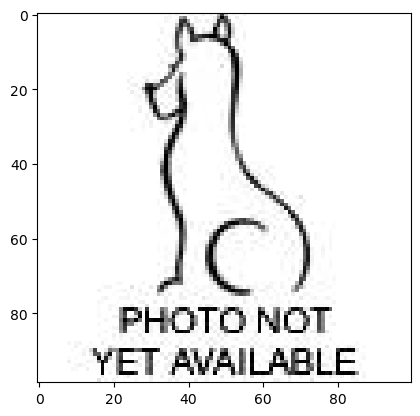

1/1 [==============================] - 0s 42ms/step
[[0.4401295]]
Das ist eine Katze


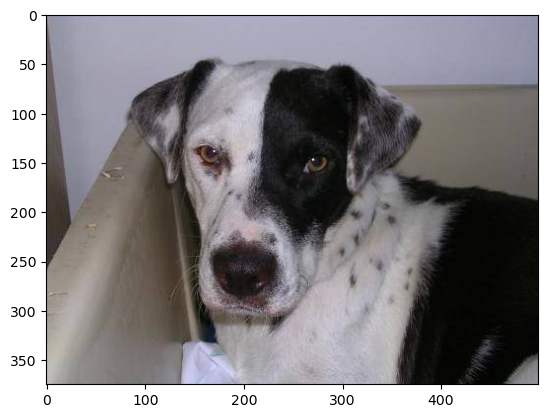

1/1 [==============================] - 0s 39ms/step
[[0.61607295]]
Das ist ein Hund


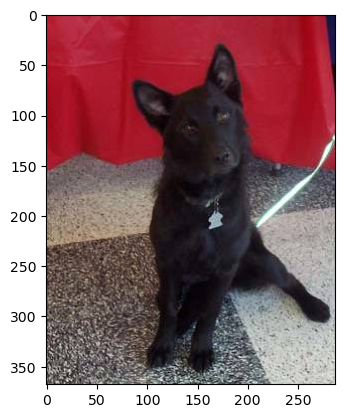

1/1 [==============================] - 0s 37ms/step
[[0.6226102]]
Das ist ein Hund


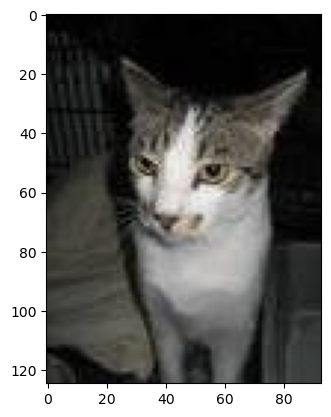

1/1 [==============================] - 0s 41ms/step
[[1.0029651e-14]]
Das ist eine Katze


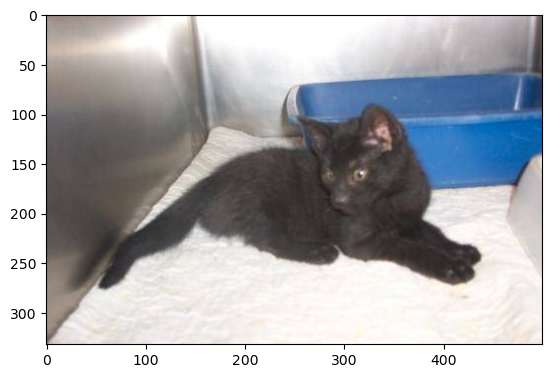

1/1 [==============================] - 0s 44ms/step
[[0.00032995]]
Das ist eine Katze


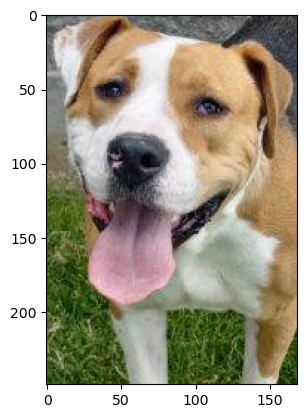

1/1 [==============================] - 0s 47ms/step
[[0.99999994]]
Das ist ein Hund


In [15]:
model = tf.keras.models.load_model("/kaggle/input/cat-dog-model/cat_dog_model.h5")
for image in os.listdir(TEST_DIR)[:30]:
#image = os.listdir(TEST_DIR)[0]
    impath = os.path.join(TEST_DIR, image)
    gen_im = tf.keras.preprocessing.image.load_img(impath, target_size = (150, 150))
    x = tf.keras.preprocessing.image.img_to_array(gen_im)
    x = x/255
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])
    imgplot = plt.imshow(mpimg.imread(impath))
    plt.show()
    pred = model.predict(images, batch_size=10)
    print(pred)
    if pred[0] > 0.5:
        print("Das ist ein Hund")
    else: print("Das ist eine Katze")
    #plt.imshow(image)
